In [1]:
import pandas as pd
import nltk
from nltk import sent_tokenize,word_tokenize 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
# from pandas import DataFrame

dataset = 'winemag-data-130k-v2.csv'



In [2]:
df = pd.read_csv(dataset, index_col="Unnamed: 0")

In [3]:
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [5]:
# Removing Rows with Missing Data, Country, Province, Variety
df = df[(df['country'].notnull())& (df['province'].notnull()) & (df['variety'].notnull())& (df['region_1'].notnull())]
# Removing Region 2, filling in region_1 with any missing data and then removing rows with missing data for region_1
df = df.drop(columns = 'region_2')


In [6]:
df.corr()

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,points,price
points,1.00000,0.41467
price,0.41467,1.00000


/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/3064777509.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html


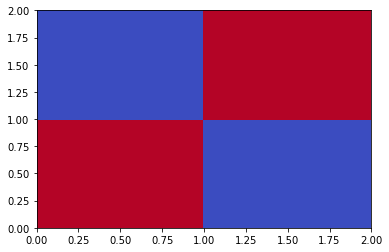

In [7]:
import matplotlib.pyplot as plot
# this is plotting the correlation on heat map (higher corelation is reds, can be seen by the line that is 1 when each is plotted against eachother)
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [8]:
df.describe()

,points,price
count,108724.000000,101400.000000
mean,88.487418,36.936558
std,3.055469,41.895979
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,28.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


In [9]:
headers = ['pos','neg','neu','compound']
texts = df["description"]
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['description']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['description']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['description']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['description']]

In [10]:
df.head(10)

df.shape

(108724, 16)

In [11]:
df.describe()

,points,price,compound,neg,neu,pos
count,108724.000000,101400.000000,108724.000000,108724.000000,108724.000000,108724.000000
mean,88.487418,36.936558,0.511293,0.014628,0.854023,0.131347
std,3.055469,41.895979,0.372523,0.031183,0.091040,0.091422
min,80.000000,4.000000,-0.928800,0.000000,0.386000,0.000000
25%,86.000000,18.000000,0.273200,0.000000,0.794000,0.065000
50%,88.000000,28.000000,0.624900,0.000000,0.860000,0.124000
75%,91.000000,45.000000,0.817600,0.000000,0.921000,0.192000
max,100.000000,3300.000000,0.993700,0.480000,1.000000,0.605000


In [12]:
df.corr()

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99357/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,points,price,compound,neg,neu,pos
points,1.000000,0.416197,0.316995,-0.179827,-0.101304,0.161811
price,0.416197,1.000000,0.072146,-0.021050,-0.010333,0.017491
compound,0.316995,0.072146,1.000000,-0.479714,-0.676672,0.836051
neg,-0.179827,-0.021050,-0.479714,1.000000,-0.155840,-0.184136
neu,-0.101304,-0.010333,-0.676672,-0.155840,1.000000,-0.942193
pos,0.161811,0.017491,0.836051,-0.184136,-0.942193,1.000000


/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99357/2567592661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html


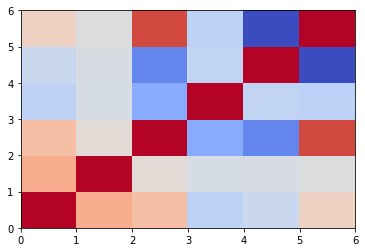

In [13]:
plot.pcolor(df.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [12]:
correlation_rating = df[df.columns[1:]].corr()['points'][:-1]

correlation_rating.sort_values(ascending=False).head(10)

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/2076139341.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_rating = df[df.columns[1:]].corr()['points'][:-1]


points      1.000000
price       0.414670
compound    0.310295
neu        -0.093452
neg        -0.177160
Name: points, dtype: float64

In [15]:



# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size = 0.3)

# # 60 is the y-->10th column for our purposes


# x_train = train.iloc[0:,0:14]
# y_train = train[[14]]
# x_test = test.iloc[0:,0:14]
# y_test = test[[15]]

# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# model = tree.DecisionTreeClassifier(max_depth = 3,criterion='entropy') # choosing entropy as decsions
# model.fit(x_train,y_train)

In [16]:
### Province:
# X = df[df.columns[0:5]].values
# y = df[df.columns[3]].values
# y

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(y)
# y = encoder.transform(y)

# array = df['province'].unique()
# encoder.fit(array)
# coded_array = encoder.transform(array)
# coded_array

# n = len(coded_array)
# n_labels = len(np.unique(coded_array))
# n_labels
# one_hot = np.zeros((n,n_labels))
# np.arange(n),coded_array
# one_hot[np.arange(n), coded_array] = 1
# one_hot

In [13]:
def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot
#one_hot_encoder(array)

In [14]:

prov_name_array = df['province'].unique()

df.columns[0]

'country'

In [15]:

country_array = one_hot_encoder(df[df.columns[0]].values)
country_name_array = df['country'].unique()
df[country_name_array] = country_array

province_array = one_hot_encoder(df[df.columns[5]].values)
prov_name_array = df['province'].unique()
df[prov_name_array] = province_array

region_1_array = one_hot_encoder(df[df.columns[6]].values)
region_1_name_array = df['region_1'].unique()
df[region_1_name_array] = region_1_array

# region_2_array = one_hot_encoder(df[df.columns[7]].values)
# region_2_name_array = df['region_2'].unique()
# df[region_2_name_array] = region_2_array

variety_array = one_hot_encoder(df[df.columns[11]].values)
variety_name_array = df['variety'].unique()
df[variety_name_array] = variety_array

country_array


/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[region_1_name_array] = region_1_array
/var/folders/bx/vxcv_d0d4mvb9fjsgycq43yr0000gn/T/ipykernel_99418/1217797872.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

ValueError: Columns must be same length as key

In [ ]:
df.head(50)

In [16]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'taster_twitter_handle', 'title',
       ...
       'Monterey County-Napa County', 'Est! Est!! Est!!! di Montefiascone',
       'Terrasses du Larzac', 'Apremont', 'San Diego County',
       'Sonoma-Napa-Lake', 'Sonoma County-Santa Barbara County', 'Del Veneto',
       'Bardolino Superiore', 'Paestum'],
      dtype='object', length=1272)

In [17]:
df = df.drop(columns = ["country", "taster_name",'taster_twitter_handle','title', 'province',
    'region_1','description','designation','variety'])

In [25]:
df.head(10)

,points,price,winery,compound,neg,neu,pos,Italy,Portugal,US,...,Monterey County-Napa County,Est! Est!! Est!!! di Montefiascone,Terrasses du Larzac,Apremont,San Diego County,Sonoma-Napa-Lake,Sonoma County-Santa Barbara County,Del Veneto,Bardolino Superiore,Paestum
0,87,NaN,Nicosia,0.1531,0.000,0.935,0.065,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87,15.0,Quinta dos Avidagos,0.6486,0.000,0.872,0.128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,87,14.0,Rainstorm,-0.1280,0.053,0.947,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87,13.0,St. Julian,0.3400,0.000,0.930,0.070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87,65.0,Sweet Cheeks,0.8176,0.000,0.817,0.183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,87,15.0,Tandem,0.1655,0.000,0.961,0.039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,87,16.0,Terre di Giurfo,0.6369,0.000,0.848,0.152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,87,24.0,Trimbach,0.0000,0.000,1.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,87,12.0,Heinz Eifel,0.9091,0.000,0.586,0.414,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,87,27.0,Jean-Baptiste Adam,0.7506,0.000,0.814,0.186,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.shape

(108724, 1263)

In [19]:
df.describe()

,points,price,compound,neg,neu,pos,Italy,US,Spain,France,...,Monterey County-Napa County,Est! Est!! Est!!! di Montefiascone,Terrasses du Larzac,Apremont,San Diego County,Sonoma-Napa-Lake,Sonoma County-Santa Barbara County,Del Veneto,Bardolino Superiore,Paestum
count,108724.000000,101400.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,...,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000,108724.000000
mean,88.487418,36.936558,0.511293,0.014628,0.854023,0.131347,0.000138,0.021403,0.000331,0.000147,...,0.000046,0.009170,0.000018,0.001021,0.000221,0.000432,0.000083,0.000727,0.000846,0.000028
std,3.055469,41.895979,0.372523,0.031183,0.091040,0.091422,0.011745,0.144724,0.018194,0.012130,...,0.006781,0.095321,0.004289,0.031936,0.014856,0.020787,0.009098,0.026946,0.029077,0.005253
min,80.000000,4.000000,-0.928800,0.000000,0.386000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,18.000000,0.273200,0.000000,0.794000,0.065000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,88.000000,28.000000,0.624900,0.000000,0.860000,0.124000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.000000,45.000000,0.817600,0.000000,0.921000,0.192000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,3300.000000,0.993700,0.480000,1.000000,0.605000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#df.info

<bound method DataFrame.info of         points  price                                    winery  compound  \
0           87    NaN                                   Nicosia    0.1531   
1           87   15.0                       Quinta dos Avidagos    0.6486   
2           87   14.0                                 Rainstorm   -0.1280   
3           87   13.0                                St. Julian    0.3400   
4           87   65.0                              Sweet Cheeks    0.8176   
...        ...    ...                                       ...       ...   
129966      90   28.0  Dr. H. Thanisch (Erben Müller-Burggraef)    0.7331   
129967      90   75.0                                  Citation    0.5267   
129968      90   30.0                           Domaine Gresser    0.1548   
129969      90   32.0                      Domaine Marcel Deiss    0.5267   
129970      90   21.0                          Domaine Schoffit    0.7003   

          neg    neu    pos  Italy  Portuga